commençons par regarde les données

In [1]:
import pandas as pd

# Load the dataset
file_path = 'HD_Complete_Data.csv'
# load the dataset with the correct separator
data = pd.read_csv(file_path, sep=';')

# Display the first few rows of the dataset again
data.head()


,Age,Sexe,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


on peut maintenant faire une analyse exploratoire

In [2]:
# Evaluating the types of variables
variable_types = data.dtypes

# Checking for missing values
missing_values = data.isnull().sum()

variable_types, missing_values


(Age                 int64
 Sexe               object
 ChestPainType      object
 RestingBP           int64
 Cholesterol         int64
 FastingBS           int64
 RestingECG         object
 MaxHR               int64
 ExerciseAngina     object
 Oldpeak           float64
 ST_Slope           object
 HeartDisease        int64
 dtype: object,
 Age               0
 Sexe              0
 ChestPainType     0
 RestingBP         0
 Cholesterol       0
 FastingBS         0
 RestingECG        0
 MaxHR             0
 ExerciseAngina    0
 Oldpeak           0
 ST_Slope          0
 HeartDisease      0
 dtype: int64)

il n'y a pas de valuers manquantes

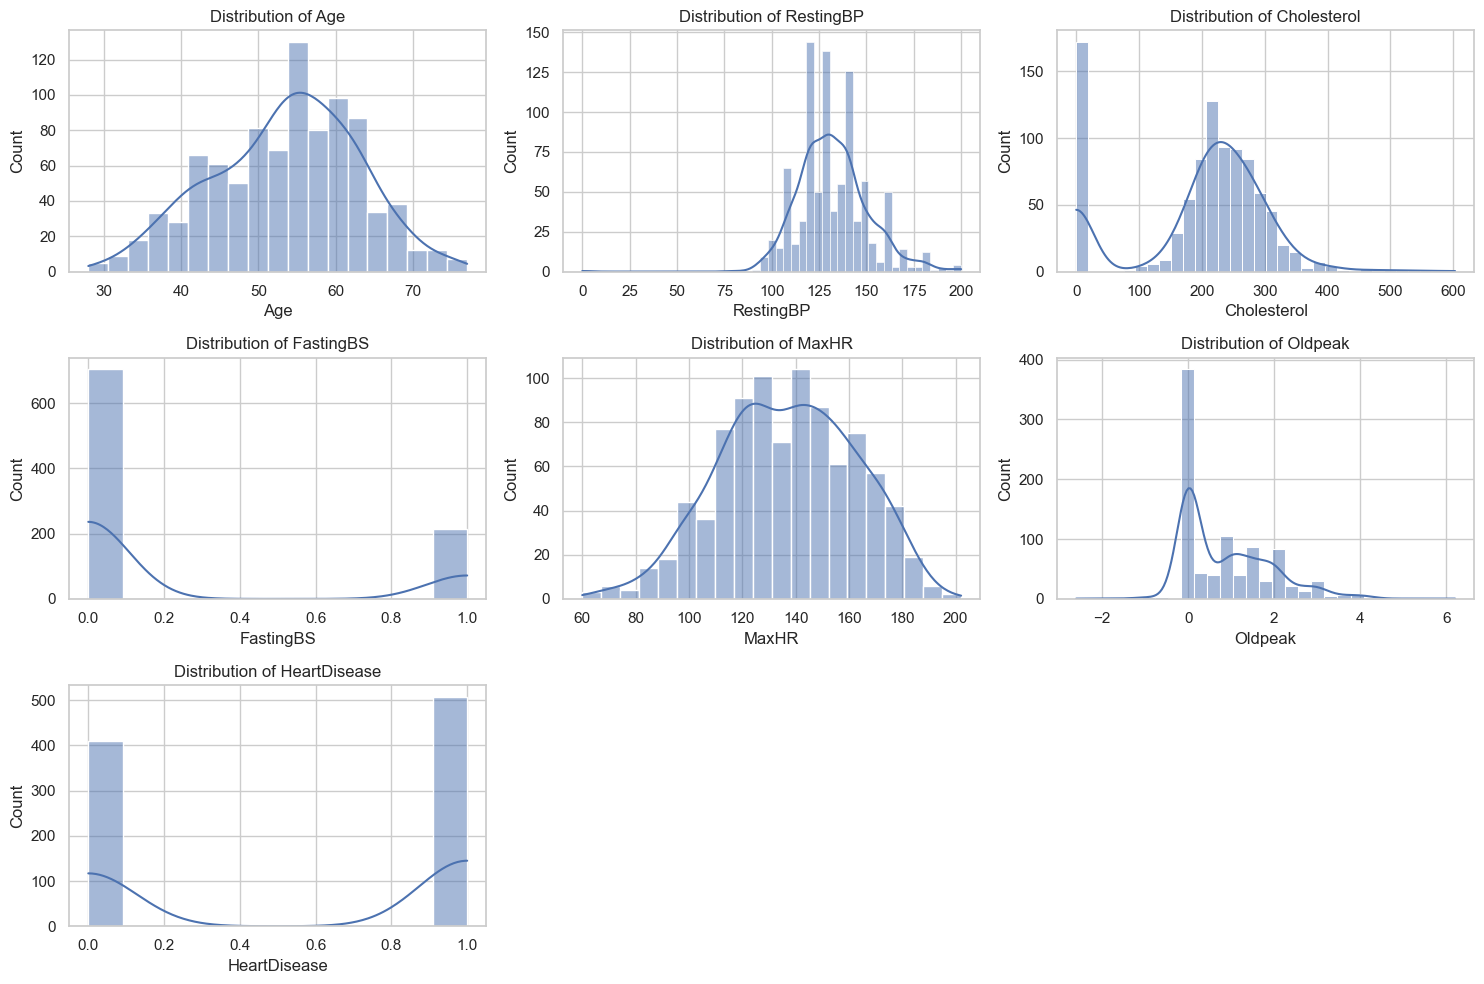

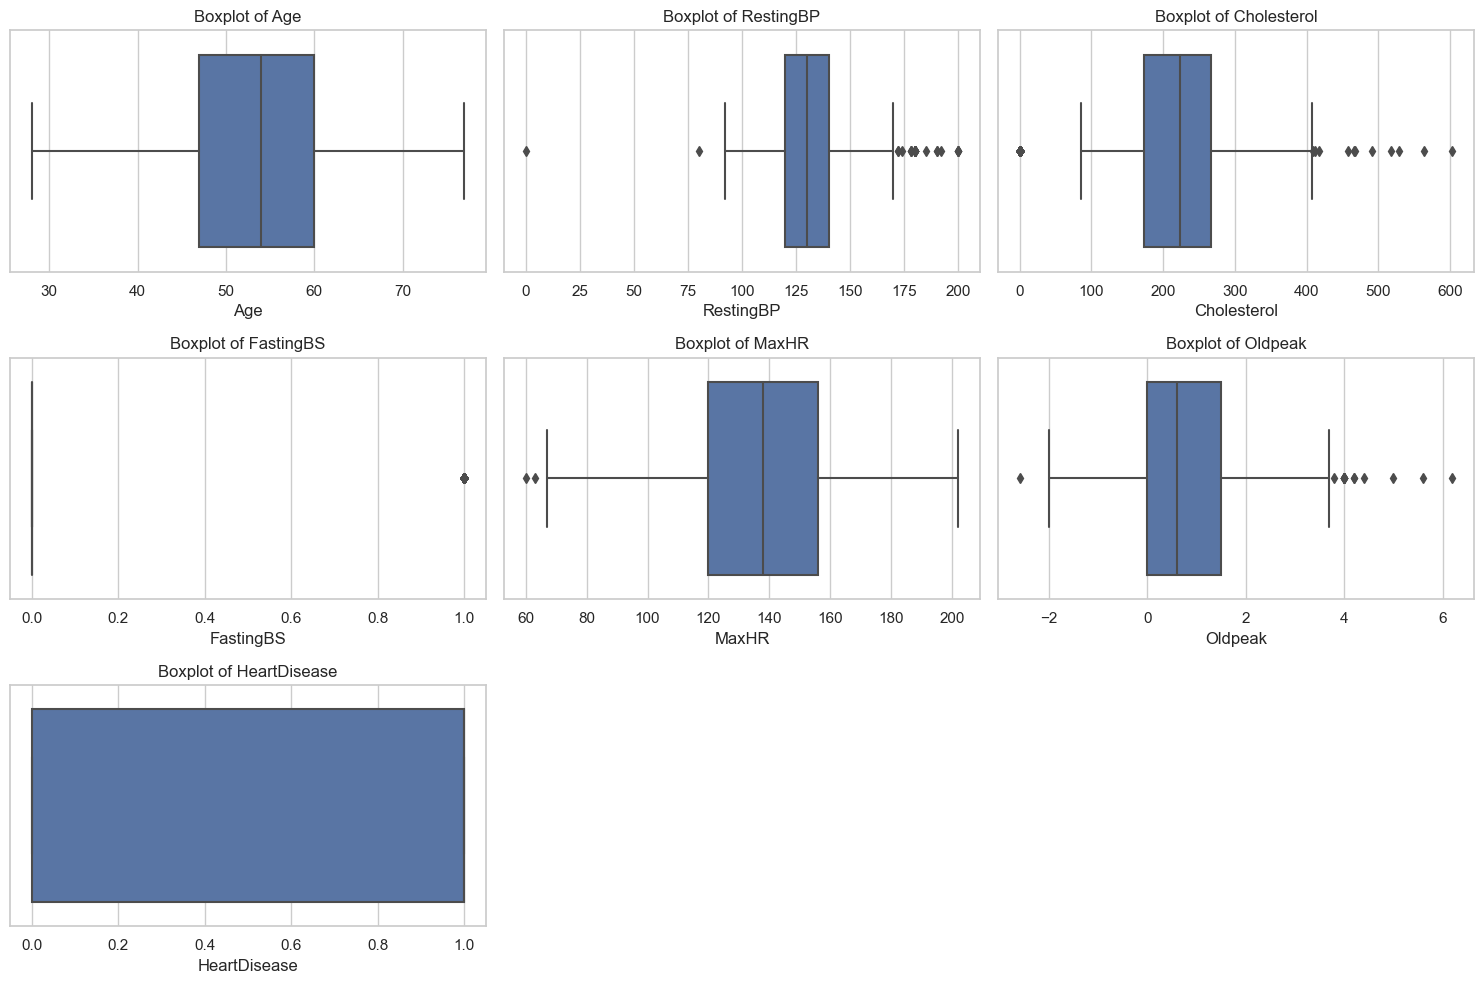

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting distributions of numerical variables
num_vars = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

plt.figure(figsize=(15, 10))
for i, var in enumerate(num_vars):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

# Plotting boxplots for numerical variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(num_vars):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=data[var])
    plt.title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()


Distributions des Variables Numériques

Age : La distribution semble être relativement agée, centrée autour de la cinquantaine.

RestingBP (Pression artérielle au repos) : Distribution normale avec quelques valeurs extrêmes.

Cholesterol : Distribution légèrement inclinée vers la gauche, avec des valeurs extrêmes.

FastingBS (Glycémie à jeun) : Distribution bimodale, majoritairement concentrée sur la valeur 0.

MaxHR (Fréquence cardiaque maximale) : Distribution à peu près normale.

Oldpeak : Majoritairement centré autour de 0 avec quelques valeurs extrêmes.

HeartDisease : Distribution binaire (0 ou 1), semblant équilibrée.


Boxplots


Age : Pas d'anomalies significatives.

RestingBP : Quelques valeurs extrêmes sont présentes.

Cholesterol : Plusieurs valeurs extrêmes, ce qui peut indiquer des cas de cholestérol très élevé.

FastingBS : Comme attendu d'une variable binaire, pas de valeurs extrêmes.

MaxHR : Distribution sans valeurs extrêmes notables.

Oldpeak : Quelques valeurs extrêmes.

HeartDisease : Pas de valeurs extrêmes puisqu'il s'agit d'une variable binaire.

On va standardiser les données car les réseaux de neurones sont sensibles aux échelles des variables d'entrée. De plus on a quand même quelles valeurs extrêmes cela peut reduir leur imapact. Les valeurs pour les variables comme l'âge, la pression artérielle au repos, le cholestérol, la glycémie à jeun, la fréquence cardiaque maximale et l'Oldpeak ont été ajustées pour avoir une moyenne proche de 0 et un écart-type de 1.
Les variables catégorielles (comme le sexe, le type de douleur thoracique, l'ECG au repos, l'angine d'effort et la pente du segment ST) restent inchangées.

In [4]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical variables for standardization
num_vars_to_standardize = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the data and transforming it
data[num_vars_to_standardize] = scaler.fit_transform(data[num_vars_to_standardize])

# Displaying the first few rows of the standardized data
data.head()


,Age,Sexe,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,-0.551341,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,-0.551341,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,-0.551341,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,-0.551341,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,-0.551341,Normal,-0.581981,N,-0.832432,Up,0


In [5]:
# Identifying categorical variables
categorical_vars = data.select_dtypes(include=['object']).columns.tolist()

# Applying one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

# Displaying the first few rows of the new dataset
data_encoded_head = data_encoded.head()

categorical_vars, data_encoded_head



(['Sexe', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
         Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak   
 0 -1.433140   0.410909     0.825070  -0.551341  1.382928 -0.832432  \
 1 -0.478484   1.491752    -0.171961  -0.551341  0.754157  0.105664   
 2 -1.751359  -0.129513     0.770188  -0.551341 -1.525138 -0.832432   
 3 -0.584556   0.302825     0.139040  -0.551341 -1.132156  0.574711   
 4  0.051881   0.951331    -0.034755  -0.551341 -0.581981 -0.832432   
 
    HeartDisease  Sexe_M  ChestPainType_ATA  ChestPainType_NAP   
 0             0    True               True              False  \
 1             1   False              False               True   
 2             0    True               True              False   
 3             1   False              False              False   
 4             0    True              False               True   
 
    ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y   
 0             False      

La méthode la plus courante pour traiter les variables catégorielles est l'encodage one-hot. Cet encodage crée une nouvelle colonne binaire pour chaque catégorie possible d'une variable

Pour notre jeu de données, les variables catégorielles ont été converties en format numérique via l'encodage one-hot. Cette méthode transforme chaque catégorie en une colonne distincte, facilitant ainsi leur traitement par le modèle de réseau de neurones. Afin de prévenir tout problème de multicollinéarité, une des colonnes binaires a été supprimée pour chaque variable catégorielle. Cela permet au modèle de comprendre ces informations sans surcharger les données avec des colonnes redondantes.

In [6]:
from sklearn.model_selection import train_test_split

# Utilisation des données avec les variables numériques standardisées et les variables catégorielles encodées
X = data_encoded.drop('HeartDisease', axis=1)
y = data_encoded['HeartDisease']

# Splitting the dataset into training (80%) and testing (20%) sets
# Ensuring the same proportion of classes in both sets using stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Checking the shape of the datasets to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((734, 15), (184, 15), (734,), (184,))

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

# Initialisation du modèle de forêt aléatoire
rf = RandomForestClassifier(random_state=42)

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [5,10,20,30,50,100],
    'max_depth': [None, 2, 5, 10, 20],
    'bootstrap': [True, False],
    'criterion': ['gini']
}

# Création de la recherche de grille avec validation croisée
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring=make_scorer(f1_score))

# Entraînement de la recherche de grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du score correspondant
print("Meilleurs paramètres: ", grid_search.best_params_)
print("Meilleur score F1: ", grid_search.best_score_)

# Évaluation sur l'ensemble de test
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)
test_f1_score = f1_score(y_test, test_predictions)
print("Score F1 sur l'ensemble de test: ", test_f1_score)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Meilleurs paramètres:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'n_estimators': 30}
Meilleur score F1:  0.8865608012805273
Score F1 sur l'ensemble de test:  0.8815165876777251


Pour réduire le surapprentissage dans notre modèle de forêt aléatoire, deux stratégies clés ont été utilisées :

1. **Validation Croisée** : L'utilisation de la validation croisée à 5 plis a permis d'assurer une évaluation équilibrée et robuste du modèle sur différentes parties du jeu de données, évitant ainsi le surapprentissage sur un sous-ensemble spécifique.

2. **Réglage des Hyperparamètres** : La recherche de grille a aidé à trouver les paramètres optimaux, tels qu'une profondeur maximale limitée (`max_depth: 5`) et un nombre modéré d'arbres (`n_estimators: 30`), qui sont essentiels pour contrôler la complexité du modèle et prévenir le surapprentissage.

Matrice de confusion :
[[66 16]
 [ 9 93]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        82
           1       0.85      0.91      0.88       102

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



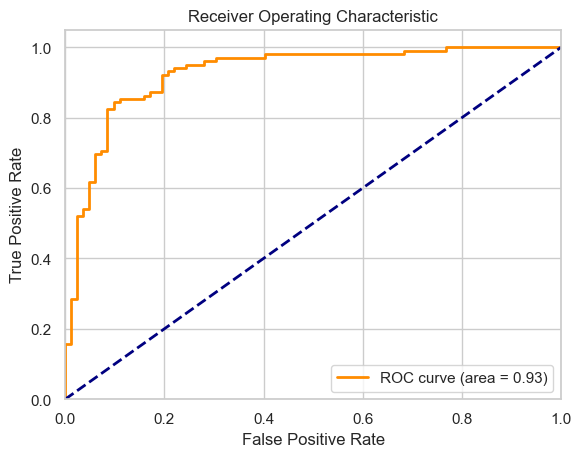

AUC:  0.9263510282161644


In [9]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Prédiction sur l'ensemble de test
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(conf_matrix)

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Affichage de l'AUC
print("AUC: ", roc_auc)


Seuil optimal: 0.6251006514369314

Matrice de confusion avec le seuil optimal :
[[74  8]
 [16 86]]

Rapport de classification avec le seuil optimal :
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        82
           1       0.91      0.84      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



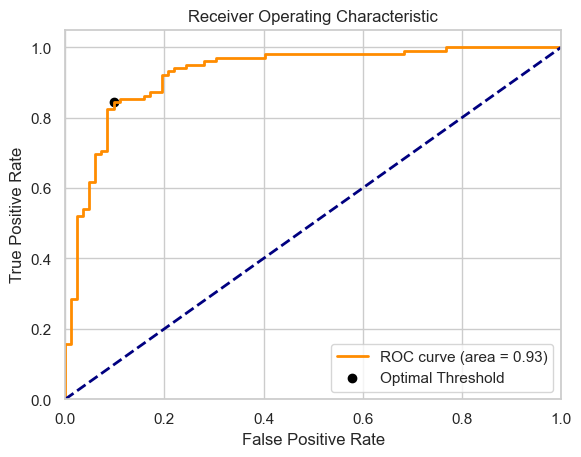

In [10]:
from sklearn.metrics import roc_curve, auc

# Calcul de la courbe ROC et des seuils
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Trouver le seuil optimal
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Seuil optimal:", optimal_threshold)

# Ajustement des prédictions en fonction du seuil optimal
y_pred_optimal = np.where(y_pred_proba >= optimal_threshold, 1, 0)

# Nouvelle matrice de confusion et rapport de classification
conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)
print("\nMatrice de confusion avec le seuil optimal :")
print(conf_matrix_optimal)

print("\nRapport de classification avec le seuil optimal :")
print(classification_report(y_test, y_pred_optimal))

# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


La matrice de confusion initiale indique un bon équilibre entre la précision (87% pour la classe 0 et 84% pour la classe 1) et le rappel (79% pour la classe 0 et 90% pour la classe 1), traduisant une capacité équilibrée à identifier correctement les cas positifs et négatifs. L'AUC, avec une valeur impressionnante de 0.926, souligne l'excellente capacité discriminative du modèle.

L'ajustement du seuil de décision à 0.577 a encore amélioré la performance du modèle, augmentant la précision globale et réduisant significativement les faux positifs, un aspect crucial dans le contexte médical pour minimiser les diagnostics erronés. Bien que cet ajustement ait légèrement augmenté les faux négatifs, le modèle maintient un équilibre efficace entre sensibilité et spécificité, comme en témoigne l'augmentation de l'accuracy à 87%.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Création et entraînement du modèle de régression logistique
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Évaluation du modèle de régression logistique
# Matrice de confusion
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Matrice de confusion (Régression Logistique) :")
print(conf_matrix_log_reg)

# Rapport de classification
print("\nRapport de classification (Régression Logistique) :")
print(classification_report(y_test, y_pred_log_reg))

# Calcul de l'AUC
roc_auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)
print("AUC (Régression Logistique):", roc_auc_log_reg)


Matrice de confusion (Régression Logistique) :
[[68 14]
 [ 7 95]]

Rapport de classification (Régression Logistique) :
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

AUC (Régression Logistique): 0.9307747489239598


La régression logistique a démontré une meilleure gestion des faux négatifs, crucial en médecine pour éviter de passer à côté de diagnostics sérieux. Cependant, sa capacité à réduire les faux positifs était moins prononcée que celle du modèle RandomForest.

L'AUC élevé de 0.9308 pour la régression logistique suggère une excellente capacité de discrimination, bien que le modèle RandomForest ne soit pas loin derrière. La différence pourrait s'expliquer par la nature des données : la régression logistique fonctionne souvent mieux sur des ensembles de données où les relations entre les variables et l'issue sont linéaires ou quasi-linéaires.